Analyzing students academic performance using CSV data to calculate subject averages and identify top
performers.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('foundational stage\\StudentsPerformance.csv',encoding='latin1')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


now cleaning the data

In [8]:
df=df.dropna()
df=df.drop_duplicates()

now calculating the average score of all subjects 

In [11]:
math_avg=df['math score'].mean()
math_avg

np.float64(66.089)

In [12]:
read_avg=df['reading score'].mean()
read_avg

np.float64(69.169)

In [13]:
write_avg=df['writing score'].mean()
write_avg

np.float64(68.054)

In [14]:
averages={'maths average':math_avg,'reading average':read_avg,'writing average':write_avg}
averages

{'maths average': np.float64(66.089),
 'reading average': np.float64(69.169),
 'writing average': np.float64(68.054)}

Creating  a Total Score column and rank students

In [18]:
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]
top_students = df.sort_values(by="total_score", ascending=False).head(5)
top_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
712,female,group D,some college,standard,none,98,100,99,297


now let's visualize the distribution of scores

<Axes: xlabel='gender'>

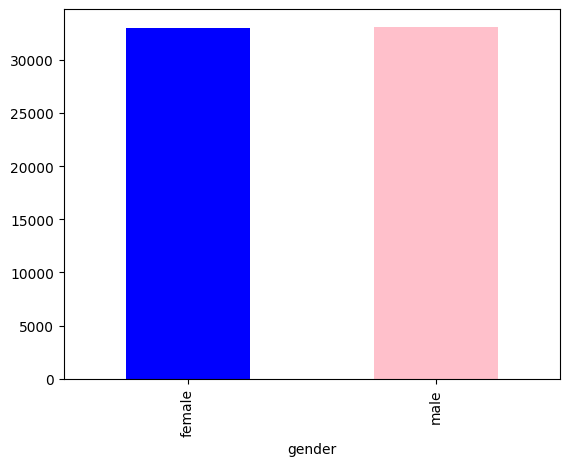

In [19]:
df.groupby("gender")["math score"].sum().plot(kind="bar", color=["blue", "pink"])

<Axes: xlabel='gender'>

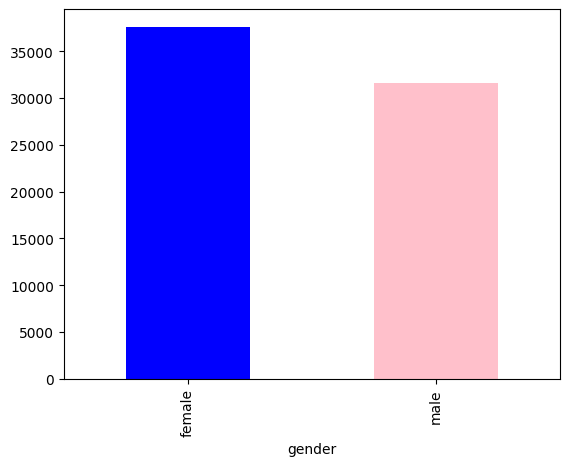

In [23]:
df.groupby("gender")["reading score"].sum().plot(kind="bar", color=["blue", "pink"])

<Axes: xlabel='gender'>

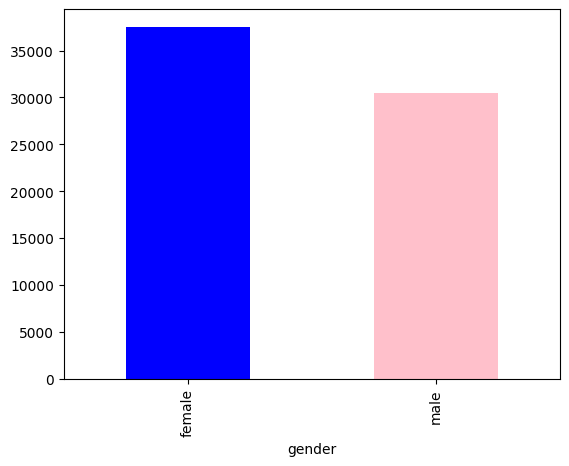

In [24]:
df.groupby("gender")["writing score"].sum().plot(kind="bar", color=["blue", "pink"])

<Axes: xlabel='parental level of education'>

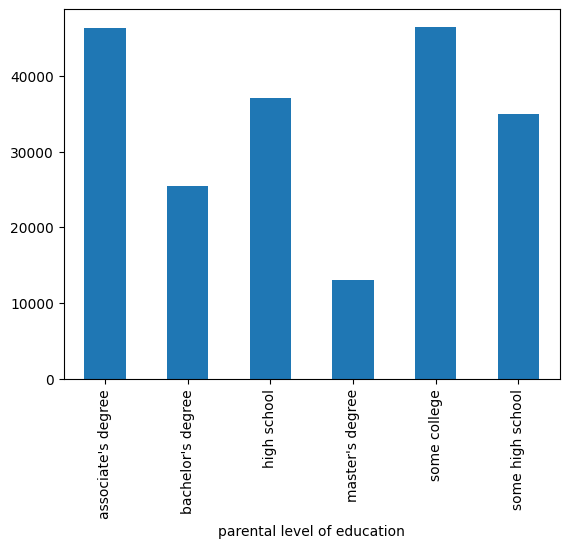

In [22]:
df.groupby("parental level of education")["total_score"].sum().plot(kind="bar")

<Axes: ylabel='math score'>

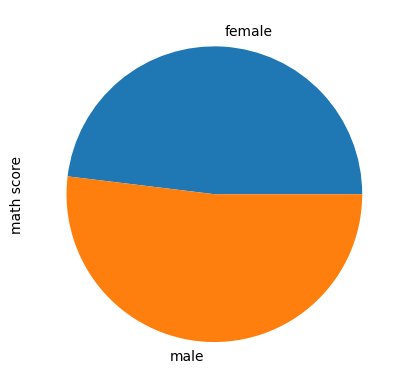

In [26]:
df.groupby("gender")["math score"].mean().plot(kind="pie")

<Axes: ylabel='reading score'>

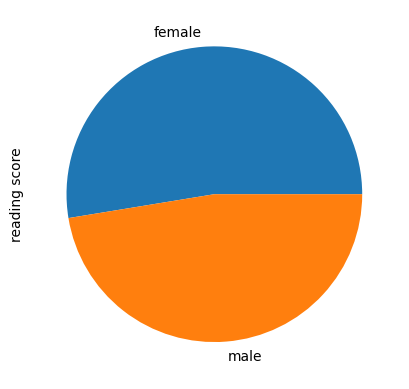

In [27]:
df.groupby("gender")["reading score"].mean().plot(kind="pie")

<Axes: ylabel='writing score'>

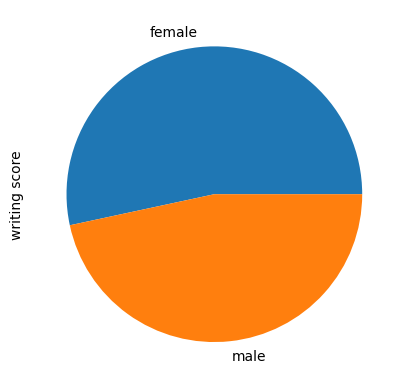

In [28]:
df.groupby("gender")["writing score"].mean().plot(kind="pie")

MARKED INSIGHTS
• Females generally perform stronger in reading and writing
• Group E significantly outperforms other race/ethnicity groups
• Math scores have wider variation

Overall Performance
- Average scores:
- Math ≈ mid-60s
- Reading ≈ high-60s to low-70s
- Writing ≈ similar to reading
- Distribution: Reading and writing scores are generally higher than math.
- Outliers: Some students scored extremely low (near 0), while others achieved perfect 100s.

Gender Differences
- Females: Consistently stronger in reading and writing.
- Males: Slight edge in math for certain groups, but overall gap is small.
- Implication: Literacy skills show a gender advantage for females.

Parental Education
- Bachelor’s/Master’s degree: Students score higher across all subjects.
- High school or some high school: Lower averages, wider spread.
- Implication: Strong correlation between parental education and student achievement.

Correlations
- Reading & Writing: Very strong positive correlation — students good at one tend to excel at the other.
- Math vs. Reading/Writing: Moderate correlation — some students excel in literacy but not math.
- Implication: Balanced interventions are needed; literacy and numeracy don’t always align.



